In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from astropy.io import fits, ascii
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, MinMaxInterval, ZScaleInterval, LogStretch
from astropy.visualization.wcsaxes import add_scalebar
import astropy.units as u

In [2]:
field = 'GDS'
filter = 'f200w'
hdu       = fits.open(glob.glob(f"/home/aurelien/DAWN/DJA_SE++/image/{field}/cutout/*{filter}*sci*.fits")[0], memmap=True)[0]
model_hdu = fits.open(glob.glob(f"/home/aurelien/DAWN/DJA_SE++/sepp/{field}/checkimages/model*{filter}*.fits")[0], memmap=True)[0]
resid_hdu = fits.open(glob.glob(f"/home/aurelien/DAWN/DJA_SE++/sepp/{field}/checkimages/resid*{filter}*.fits")[0], memmap=True)[0]

In [3]:
cat = fits.open(glob.glob(f"/home/aurelien/DAWN/DJA_SE++/sepp/{field}/*sepp_cat.fits")[0])[1].data

In [4]:
headers = cat.columns.info('name', output=False)
print(headers['name'])

['pixel_centroid_x', 'pixel_centroid_y', 'world_centroid_alpha', 'world_centroid_delta', 'source_id', 'detection_id', 'group_id', 'group_stamp_top', 'group_stamp_left', 'group_stamp_width', 'group_stamp_height', 'source_flags', 'n_detected_pixels', 'n_core_pixel', 'APER_flux', 'APER_flux_err', 'APER_mag', 'APER_mag_err', 'APER_flags', 'auto_flux', 'auto_flux_err', 'auto_mag', 'auto_mag_err', 'auto_flags', 'flux_radius', 'snrratio', 'ellipse_a', 'ellipse_b', 'ellipse_theta', 'ellipse_cxx', 'ellipse_cyy', 'ellipse_cxy', 'area', 'elongation', 'ellipticity', 'fmf_reduced_chi_2', 'fmf_iterations', 'fmf_stop_reason', 'fmf_duration', 'fmf_flags', 'fmf_chi2_per_meta', 'fmf_iterations_per_meta', 'fmf_meta_iterations', 'RA_MODEL', 'RA_MODEL_err', 'DEC_MODEL', 'DEC_MODEL_err', 'RADIUS', 'RADIUS_err', 'AXRATIO', 'AXRATIO_err', 'ANGLE', 'ANGLE_err', 'SERSIC', 'SERSIC_err', 'X_SERSIC', 'X_SERSIC_err', 'MAG_MODEL_F090W', 'MAG_MODEL_F090W_err', 'FLUX_MODEL_F090W', 'FLUX_MODEL_F090W_err', 'MAG_MODEL_F1

### Catalog fit

In [5]:
def add_good_scalebar(ax, wcs, color='white', fraction=0.25):
    width = abs(wcs.pixel_scale_matrix[0,0]*wcs.pixel_shape[0])*u.degree
    good_values = [0.5*u.arcsec, 1*u.arcsec, 2*u.arcsec, 3*u.arcsec, 5*u.arcsec, 10*u.arcsec, 20*u.arcsec,
                   0.5*u.arcmin, 1*u.arcmin, 2*u.arcmin, 3*u.arcmin, 5*u.arcmin, 10*u.arcmin, 20*u.arcmin,
                   0.5*u.degree, 1*u.degree, 2*u.degree, 5*u.degree, 10*u.degree]
    dist = np.array([(fraction*width-val).value for val in good_values])
    dist[dist<0] = np.inf
    size = good_values[np.argmin(dist)]
    add_scalebar(ax, size, label=f"{size:latex}", color=color, fontproperties=FontProperties(size='x-large'), label_top=True, pad=0.1)

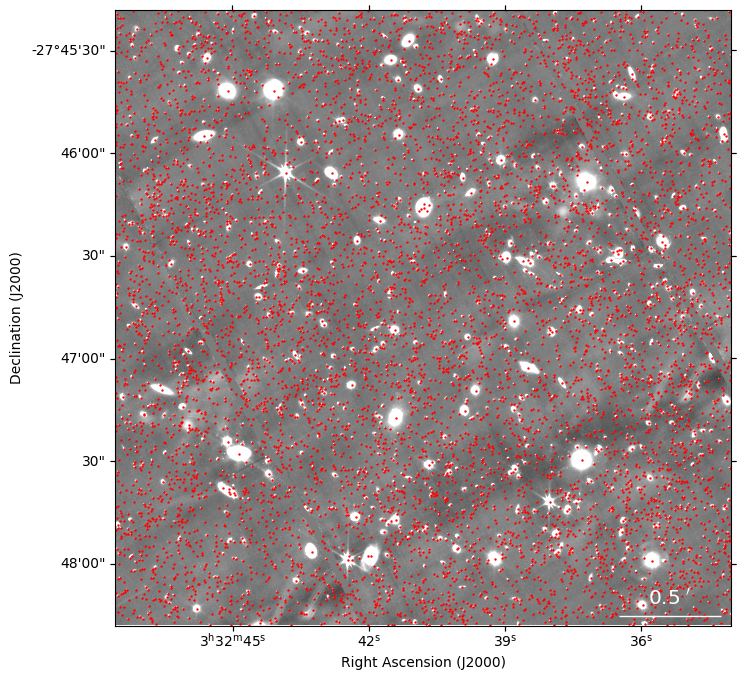

In [6]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection':WCS(hdu.header)})
norm = ImageNormalize(hdu.data, interval=ZScaleInterval())
ax.imshow(hdu.data, cmap='gray', origin='lower', norm=norm)
ax.scatter(cat['world_centroid_alpha'], cat['world_centroid_delta'], transform=ax.get_transform('world'), c='r', s=0.5)
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')
add_good_scalebar(ax, WCS(hdu.header))
plt.show()

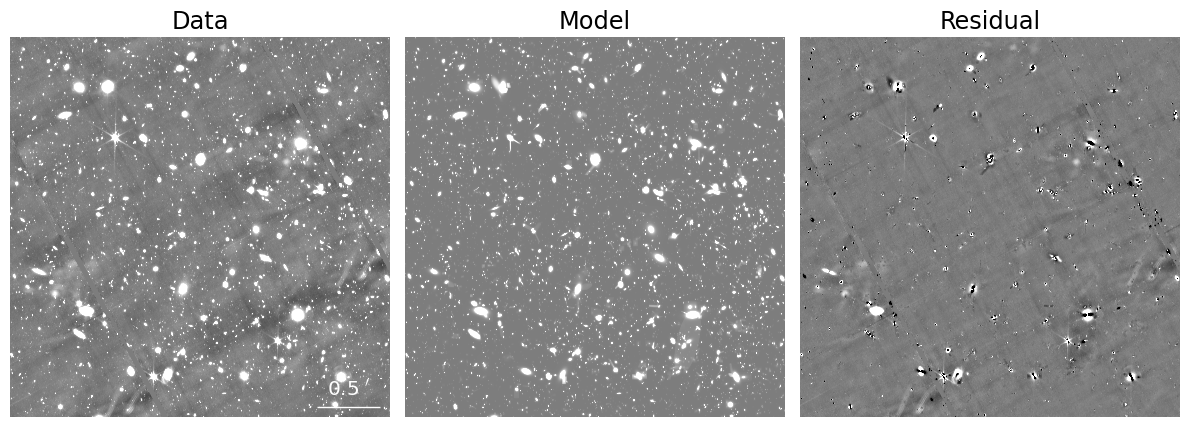

In [7]:
fig = plt.figure(figsize=(12,8))
#Plots data
wcs = WCS(hdu.header)
ax = fig.add_subplot(1,3,1, projection=wcs)
norm = ImageNormalize(hdu.data, interval=ZScaleInterval())
ax.imshow(hdu.data, cmap='gray', origin='lower', norm=norm)
add_good_scalebar(ax, wcs)
ax.set_axis_off()
ax.set_title("Data", size='xx-large')
# Plots model
ax_model = fig.add_subplot(1,3,2, projection=wcs)
ax_model.imshow(model_hdu.data, cmap='gray', origin='lower', norm=norm)
ax_model.set_axis_off()
ax_model.set_title("Model", size='xx-large')
# Plots residual
ax_resid = fig.add_subplot(1,3,3, projection=wcs)
ax_resid.imshow(resid_hdu.data, cmap='gray', origin='lower', norm=norm)
ax_resid.set_axis_off()
ax_resid.set_title("Residual", size='xx-large')

fig.tight_layout()
plt.show()

### Zoom and image-model displays

/home/aurelien/miniforge3/envs/dawn/lib/python3.9/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: divide by zero encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/home/aurelien/miniforge3/envs/dawn/lib/python3.9/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: invalid value encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


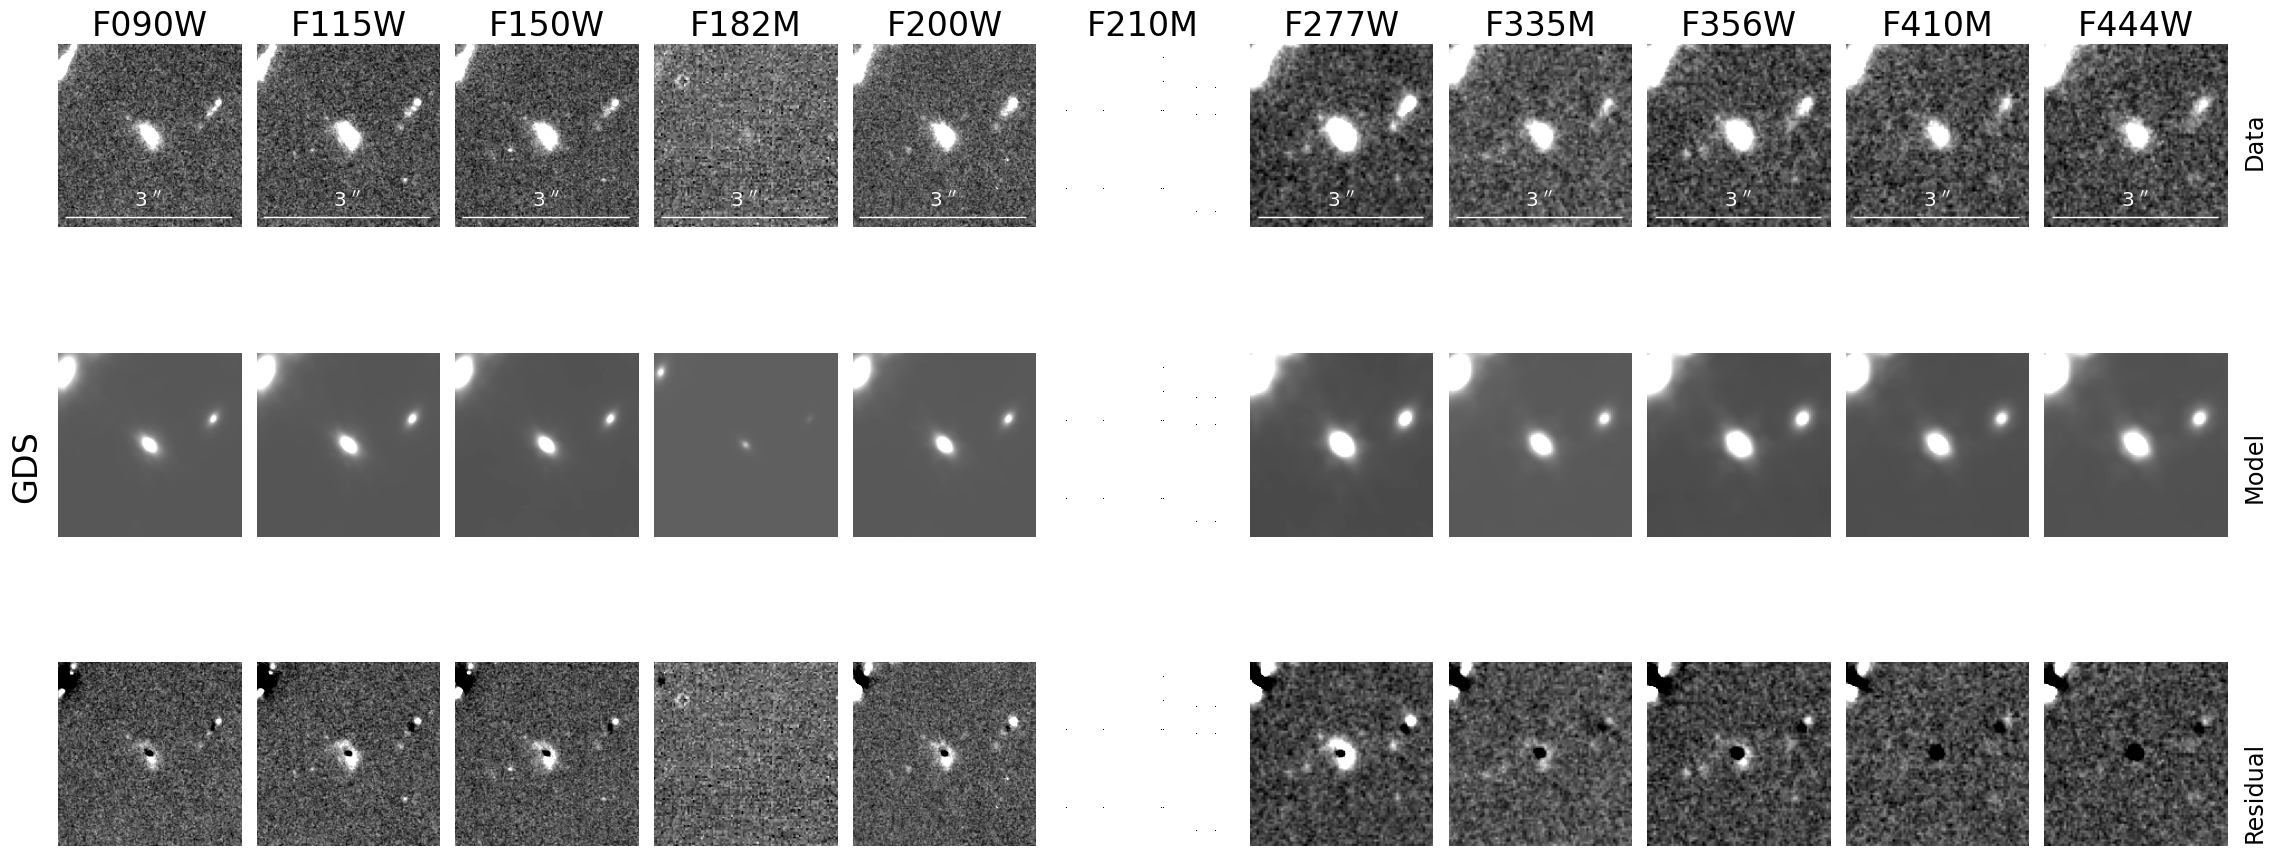

In [8]:
# filter_list = ['f090w', 'f115w', 'f150w', 'f182m', 'f200w', 'f210m', 'f277w', 'f335m', 'f356w', 'f410m', 'f444w']
filter_list = ['f090w', 'f115w', 'f150w', 'f182m', 'f200w', 'f210m', 'f277w', 'f335m', 'f356w', 'f410m', 'f444w']

# target = SkyCoord('53.166338 -27.821555', frame='icrs', unit='deg') # JADES-GS-z12-0
id = 800
target = SkyCoord(cat['world_centroid_alpha'][id-1], cat['world_centroid_delta'][id-1], frame='icrs', unit='deg')
size = u.Quantity((3.3,3.3), u.arcsec)

fig = plt.figure(figsize=(2*len(filter_list),len(filter_list)-0.5))
for i, filter in enumerate(filter_list):
    # Loads images
    hdu       = fits.open(glob.glob(f"/home/aurelien/DAWN/DJA_SE++/image/{field}/cutout/*{filter}*sci*.fits")[0], memmap=True)[0]
    model_hdu = fits.open(glob.glob(f"/home/aurelien/DAWN/DJA_SE++/sepp/{field}/checkimages/model*{filter}*.fits")[0], memmap=True)[0]
    resid_hdu = fits.open(glob.glob(f"/home/aurelien/DAWN/DJA_SE++/sepp/{field}/checkimages/resid*{filter}*.fits")[0], memmap=True)[0]
    wcs = WCS(hdu.header)
    # Cutouts in images
    cutout       = Cutout2D(hdu.data,       position=target, size=size, wcs=wcs)
    model_cutout = Cutout2D(model_hdu.data, position=target, size=size, wcs=wcs)
    resid_cutout = Cutout2D(resid_hdu.data, position=target, size=size, wcs=wcs)
    #Plots data
    ax = fig.add_subplot(3,len(filter_list),i+1, projection=cutout.wcs)
    norm = ImageNormalize(cutout.data, interval=ZScaleInterval())
    # norm = ImageNormalize(cutout.data, interval=MinMaxInterval(), stretch=LogStretch())
    ax.imshow(cutout.data, cmap='gray', origin='lower', norm=norm)
    add_good_scalebar(ax, cutout.wcs, fraction=1.0)
    ax.set_title(filter.upper(), fontsize=24)
    ax.set_axis_off()
    # Plots model
    ax_model = fig.add_subplot(3,len(filter_list),i+len(filter_list)+1, projection=cutout.wcs)
    ax_model.imshow(model_cutout.data, cmap='gray', origin='lower', norm=norm)
    ax_model.set_axis_off()
    # Plots residual
    ax_resid = fig.add_subplot(3,len(filter_list),i+2*len(filter_list)+1, projection=cutout.wcs)
    ax_resid.imshow(resid_cutout.data, cmap='gray', origin='lower', norm=norm)
    ax_resid.set_axis_off()
plt.figtext(1.0, 0.79, "Data", figure=fig, va='center', ha='left', rotation='vertical', fontsize='xx-large')
plt.figtext(1.0, 0.48, "Model", figure=fig, va='center', ha='left',rotation='vertical', fontsize='xx-large')
plt.figtext(1.0, 0.17, "Residual", figure=fig, va='center', ha='left',rotation='vertical', fontsize='xx-large')
plt.figtext(0.0, 0.48, field, figure=fig, va='center', ha='right', rotation='vertical', fontsize=24)
fig.tight_layout()
# fig.savefig("/home/aurelien/DAWN/DJA_SE++/JADES-GS-z12-0_SE++.png", bbox_inches='tight', dpi=100)
plt.show()

### Photometric spectrum

In [9]:
def plot_filters(ax, filter_list, scale=1, names=True, throughput_folder="/home/aurelien/DAWN/DJA_SE++/JWST-doc/NIRCam_Filters-Throughput"):
    """
    Plots filters throughput on ax
    Sources : https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-instrumentation/nircam-filters
    """
    color_dict = {'F090W':'#0000E3', 
                  'F115W':'#1020FF',
                  'F150W':'#0162FF',
                  'F182M':'#00B1FF',
                  'F200W':'#04D1FF',
                  'F210M':'#02E8F4',
                  'F277W':'#87FF7F',
                  'F335M':'#EBFF0C',
                  'F356W':'#FFD807',
                  'F410M':'#FF6D03',
                  'F444W':'#FF330C',}
    for filter in filter_list:
        table = ascii.read(f"{throughput_folder}/{filter.upper()}_mean_system_throughput.txt")
        color = color_dict[filter.upper()] if filter.upper() in color_dict else '#000000'
        max_val = scale if 'w' in filter else scale/2
        ax.plot(table['Microns'], max_val*table['Throughput']/table['Throughput'].max(), color=color)
        ax.fill_between(table['Microns'], max_val*table['Throughput']/table['Throughput'].max(), alpha=0.4, color=color)
        if names: ax.text(np.average(table['Microns'], weights=table['Throughput']), 0.55*max_val, filter.upper(), ha='center', va='center', c='k', size='x-small')

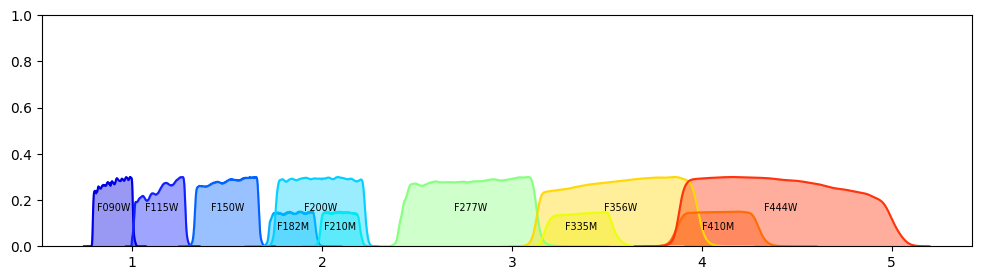

In [10]:
fig, ax = plt.subplots(figsize=(12,3))
plot_filters(ax, filter_list, scale=0.3, names=True)
ax.set_ylim(0,1)
plt.show()

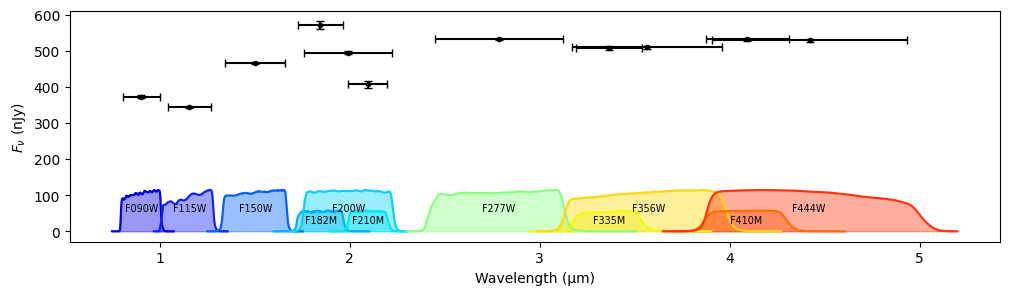

In [18]:
# cat_points = SkyCoord(cat['world_centroid_alpha'], cat['world_centroid_delta'], unit='deg', frame='icrs', equinox='J2000')
# sep = target.separation(cat_points)
# idx = np.argmin(sep)

filters_waveband = {'F090W': {'pivot': 0.901, 'band': 0.194},
                    'F115W': {'pivot': 1.154, 'band': 0.225},
                    'F150W': {'pivot': 1.501, 'band': 0.318},
                    'F182M': {'pivot': 1.845, 'band': 0.238},
                    'F200W': {'pivot': 1.990, 'band': 0.461},
                    'F210M': {'pivot': 2.093, 'band': 0.205},
                    'F277W': {'pivot': 2.786, 'band': 0.672},
                    'F300M': {'pivot': 2.996, 'band': 0.318},
                    'F335M': {'pivot': 3.365, 'band': 0.347},
                    'F356W': {'pivot': 3.563, 'band': 0.787},
                    'F410M': {'pivot': 4.092, 'band': 0.436},
                    'F444W': {'pivot': 4.421, 'band': 1.024},}

id = 1000
flux_target = [10*cat[id-1][f"FLUX_MODEL_{filter}"] for filter in filter_list]
flux_err_target = [10*cat[id-1][f"FLUX_MODEL_{filter}_ERR"] for filter in filter_list]
mag_target = [cat[id-1][f"MAG_MODEL_{filter}"] for filter in filter_list]
mag_err_target = [cat[id-1][f"MAG_MODEL_{filter}_ERR"] for filter in filter_list]

fig, ax = plt.subplots(figsize=(12,3))
plot_filters(ax, filter_list, max(flux_target)/5)
ax.errorbar([filters_waveband[filter.upper()]['pivot'] for filter in filter_list], flux_target, 
            xerr=np.array([filters_waveband[filter.upper()]['band'] for filter in filter_list])/2, yerr=flux_err_target, 
            fmt='o', ms=3, c='k', capsize=3, capthick=1)
ax.set_xlabel("Wavelength (µm)")
ax.set_ylabel(r"$F_{\nu}$ (nJy)")
# ax.set_title("JADES-GS-z12.0")
plt.show()